In [65]:
import csv
import numpy as np
from itertools import combinations
total_bin = 50
interp = 7
import json

In [66]:
with open('Pu_TOT.csv') as f:
        reader = csv.reader(f)
        header = next(reader)
        data = [[float(x) for x in row] for row in reader]
        total = np.asarray(data)

Create 3D data tiles that cover interaction between all dimensions

In [67]:
#cols = total.shape[1]
all_tiles = list(combinations(header,3))
all_ind = list(combinations(range(len(header)),3))
num = len(all_tiles)
total = np.asarray(data)

In [68]:
r = np.random.randn(100,3)
tiles = {}
for i in range(num):
    cur_key = '/'.join(list(all_tiles[i]))
    
    tiles[cur_key]={}
    tiles[cur_key]["dim"] = list(all_tiles[i])
    
    cur_ind = list(all_ind[i])
    cur_data = total[:,cur_ind]
    H, edges = np.histogramdd(cur_data, bins = (total_bin, total_bin, total_bin))
    tiles[cur_key]["tile"] = H.tolist()
    tiles[cur_key]["mark"] = [edge.tolist() for edge in edges]
with open('multi_tiles_50.json', 'w') as outfile:  
    json.dump(tiles, outfile)

In [69]:
tiles[cur_key]

{'dim': ['Fr_MOX', 'TC_MOX', 'Pu_TOT'],
 'mark': [[0.0,
   0.004,
   0.008,
   0.012,
   0.016,
   0.02,
   0.024,
   0.028,
   0.032,
   0.036000000000000004,
   0.04,
   0.044,
   0.048,
   0.052000000000000005,
   0.056,
   0.06,
   0.064,
   0.068,
   0.07200000000000001,
   0.076,
   0.08,
   0.084,
   0.088,
   0.092,
   0.096,
   0.1,
   0.10400000000000001,
   0.108,
   0.112,
   0.116,
   0.12,
   0.124,
   0.128,
   0.132,
   0.136,
   0.14,
   0.14400000000000002,
   0.148,
   0.152,
   0.156,
   0.16,
   0.164,
   0.168,
   0.17200000000000001,
   0.176,
   0.18,
   0.184,
   0.188,
   0.192,
   0.196,
   0.2],
  [0.001495,
   0.4014651000000001,
   0.8014352000000001,
   1.2014053000000002,
   1.6013754000000002,
   2.0013455,
   2.4013156,
   2.8012857,
   3.2012558,
   3.6012259,
   4.001196,
   4.401166100000001,
   4.801136200000001,
   5.201106300000001,
   5.601076400000001,
   6.001046500000001,
   6.401016600000001,
   6.800986700000001,
   7.200956800000001,
   7.

Normalization

In [37]:
# cols = total.shape[1]
# #Normalize First! 
# total_normed = (total- total.min(axis=0))/ (total.max(axis=0)-total.min(axis=0))

Progressive Interpolation

In [69]:
# cur_arr = np.array([])
# cur_mark = np.array([])
# for i in range(cols-1):
#     step = np.linspace(0, 1, num=interp+1, endpoint = False)
#     print step
#     #print step
#     for val in step:
#         #print val
#         #print val*total_normed[:,i]+(1-val)*total_normed[:,i+1]
#         cur_bin, cur_range = np.histogram(val*total_normed[:,i]+(1-val)*total_normed[:,i+1], bins = total_bin)
#         #print cur_arr
#         #print cur_bin
#         ##cur_arr = np.concatenate((cur_arr, cur_bin.T), axis=1) if cur_arr.size is not 0 else cur_bin.T
#         cur_arr = np.vstack((cur_arr, cur_bin)) if cur_arr.size is not 0 else cur_bin
#         cur_mark = np.vstack((cur_mark, cur_range)) if cur_mark.size is not 0 else cur_range

# cur_bin, cur_range = np.histogram(total_normed[:,-1], bins = total_bin)
# #print cur_bin
# cur_arr = np.vstack((cur_arr, cur_bin))
# cur_mark = np.vstack((cur_mark, cur_range)) 

[ 0.     0.125  0.25   0.375  0.5    0.625  0.75   0.875]
[ 0.     0.125  0.25   0.375  0.5    0.625  0.75   0.875]
[ 0.     0.125  0.25   0.375  0.5    0.625  0.75   0.875]
[ 0.     0.125  0.25   0.375  0.5    0.625  0.75   0.875]


In [43]:
tiles

{'BU_MOX/Fr_MOX/Pu_TOT': {'dim': ['BU_MOX', 'Fr_MOX', 'Pu_TOT'],
  'mark': [array([30. , 33.5, 37. , 40.5, 44. , 47.5, 51. , 54.5, 58. , 61.5, 65. ]),
   array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ]),
   array([ 9.1675823 , 10.28115377, 11.39472524, 12.50829671, 13.62186818,
          14.73543965, 15.84901112, 16.96258259, 18.07615406, 19.18972553,
          20.303297  ])],
  'tile': array([[[ 0.,  0.,  0.,  3., 19., 20., 18., 13.,  7., 10.],
          [ 0.,  0.,  0., 14., 21., 30., 21., 13., 13.,  1.],
          [ 0.,  0., 16., 29., 24., 13., 12.,  8.,  3.,  0.],
          [ 0.,  2., 23., 12., 20.,  8., 20.,  6.,  0.,  0.],
          [ 0., 13., 42., 13., 16., 14.,  9.,  1.,  0.,  0.],
          [ 0., 28., 29., 14., 11., 13.,  0.,  0.,  0.,  0.],
          [ 0., 32., 31., 24., 14.,  2.,  0.,  0.,  0.,  0.],
          [ 0., 37., 33., 13., 15.,  0.,  0.,  0.,  0.,  0.],
          [ 4., 45., 16., 19.,  9.,  0.,  0.,  0.,  0.,  0.],
          [13., 46., 26., 16.

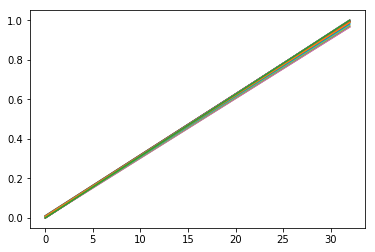

In [72]:
cur_mark
#np.linspace(0, 1, num=interp+2)
#a, b = np.histogram(total_normed[:,1], bins=total_bin)

import matplotlib.pyplot as plt
plt.plot(cur_mark.T)
#plt.ylabel('some numbers')
plt.show()

In [10]:
a = np.array((1,2,3))
b = np.array([])
np.column_stack((a,b))


ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [37]:
# cols = total.shape[1]
# #Normalize First! 
# total_normed = (total- total.min(axis=0))/ (total.max(axis=0)-total.min(axis=0))